# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [14]:
A + B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [15]:
A * B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

### Dot product

In [16]:
A.shape

(2, 3)

In [17]:
B.shape

(3, 2)

In [18]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [19]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [20]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [21]:
C.shape

(6, 2)

In [22]:
A.shape

(2, 3)

In [23]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [24]:
A.dot(C)

ValueError: shapes (2,3) and (6,2) not aligned: 3 (dim 1) != 6 (dim 0)

## Gradient descent

![](../data/banknotes.png)

In [25]:
df = pd.read_csv('../data/banknotes.csv')

In [26]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [28]:
import seaborn as sns

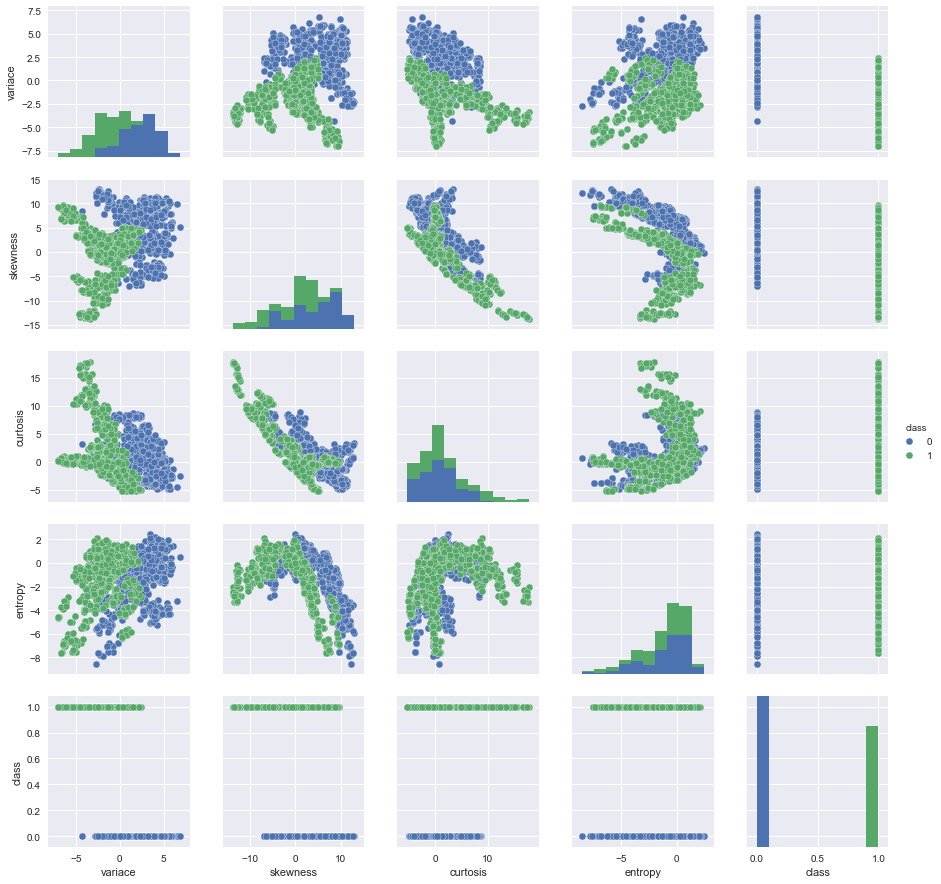

In [29]:
sns.pairplot(df, hue="class")

#### Baseline model

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [31]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [32]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99344978,  0.99124726,  0.99343545])

### Logistic Regression Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [34]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [35]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 0.5878 - acc: 0.6917     
Epoch 2/10
960/960 [==============================] - 0s - loss: 0.5575 - acc: 0.7250     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.5327 - acc: 0.7563     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.5119 - acc: 0.7771     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.4940 - acc: 0.7927     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.4785 - acc: 0.8042     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.4647 - acc: 0.8094     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.4523 - acc: 0.8135     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.4411 - acc: 0.8271     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [36]:
historydf = pd.DataFrame(history.history, index=history.epoch)

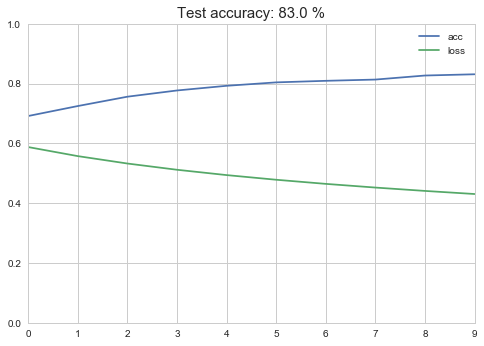

In [37]:
sns.set_style("whitegrid")
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [38]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [39]:
historydf = pd.concat(dflist, axis=1)

In [40]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.347917,0.883285,0.787500,0.487146,0.761458,0.538540,0.931250,0.252399
1,0.453125,0.779973,0.877083,0.366175,0.947917,0.277512,0.968750,0.119337
2,0.546875,0.703690,0.895833,0.312300,0.955208,0.215464,0.972917,0.092150
3,0.592708,0.645158,0.910417,0.275081,0.962500,0.181578,0.977083,0.078207
4,0.627083,0.598217,0.919792,0.246636,0.965625,0.158899,0.978125,0.070248
5,0.659375,0.559514,0.930208,0.223954,0.967708,0.142624,0.980208,0.064856
6,0.704167,0.526636,0.933333,0.205495,0.967708,0.130361,0.980208,0.060422
7,0.733333,0.498334,0.944792,0.190115,0.969792,0.120679,0.981250,0.057047
8,0.763542,0.473353,0.952083,0.177294,0.969792,0.112968,0.981250,0.054568
9,0.780208,0.451241,0.955208,0.166345,0.971875,0.106561,0.980208,0.052215


In [41]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [42]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.347917  0.883285  0.787500  0.487146  0.761458  0.538540   
1              0.453125  0.779973  0.877083  0.366175  0.947917  0.277512   
2              0.546875  0.703690  0.895833  0.312300  0.955208  0.215464   
3              0.592708  0.645158  0.910417  0.275081  0.962500  0.181578   
4              0.627083  0.598217  0.919792  0.246636  0.965625  0.158899   
5              0.659375  0.559514  0.930208  0.223954  0.967708  0.142624   
6              0.704167  0.526636  0.933333  0.205495  0.967708  0.130361   
7              0.733333  0.498334  0.944792  0.190115  0.969792  0.120679   
8              0.763542  0.473353  0.952083  0.177294  0.969792  0.112968   
9              0.780208  0.451241  0.955208  0.166345  0.971875  0.106561   

learning_rate      0.50            
metric              acc      loss  
0              0.931250  0.252399  
1              0.968750  0.119337  
2              0.972917  0.092150  
3              0.977083  0.078207  
4              0.978125  0.070248  
5              0.980208  0.064856  
6              0.980208  0.060422  
7              0.981250  0.057047  
8              0.981250  0.054568  
9              0.980208  0.052215

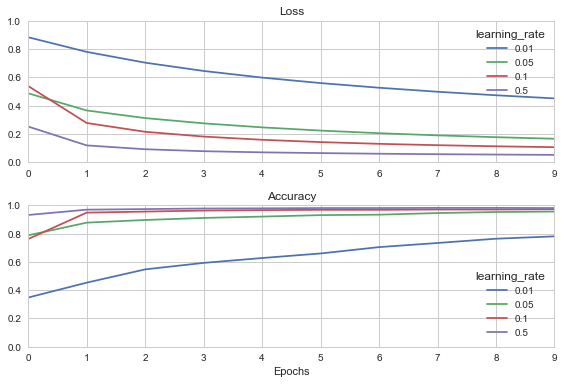

In [43]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [44]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [45]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [46]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.636458  0.602279  0.538542  0.737264  0.495833  1.036168   
1           0.676042  0.557442  0.555208  0.700556  0.507292  0.960747   
2           0.711458  0.520250  0.585417  0.668537  0.517708  0.890848   
3           0.756250  0.488683  0.613542  0.640368  0.536458  0.826789   
4           0.784375  0.461550  0.629167  0.615311  0.547917  0.768619   
5           0.803125  0.437798  0.650000  0.592928  0.572917  0.716375   
6           0.820833  0.416787  0.670833  0.572635  0.594792  0.669900   
7           0.838542  0.397975  0.684375  0.554149  0.623958  0.628771   
8           0.851042  0.381042  0.706250  0.537161  0.652083  0.592719   
9           0.862500  0.365686  0.714583  0.521494  0.684375  0.561136   

batch_size       128            
metric           acc      loss  
0           0.567708  0.676839  
1           0.585417  0.664568  
2           0.593750  0.652902  
3           0.613542  0.641768  
4           0.634375  0.631278  
5           0.651042  0.621169  
6           0.665625  0.611341  
7           0.679167  0.602082  
8           0.702083  0.593230  
9           0.707292  0.584703

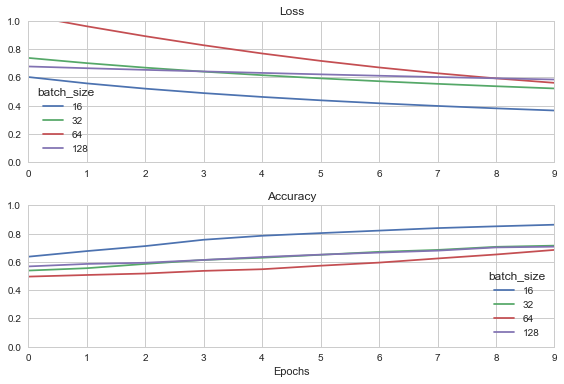

In [47]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [48]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
# RMSprop and Adam converge quickly in the example below.

In [49]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [50]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

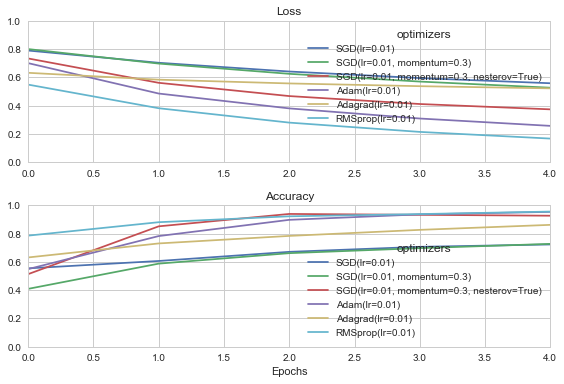

In [51]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [52]:
# changing initializations can help you get out of a local minima
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [53]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

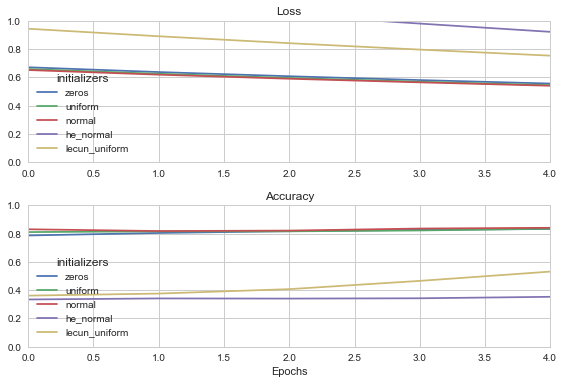

In [54]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [55]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=10,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/10
672/672 [==============================] - 0s - loss: 0.5793 - acc: 0.6414 - val_loss: 0.5311 - val_acc: 0.7465
Epoch 2/10
672/672 [==============================] - 0s - loss: 0.4387 - acc: 0.8467 - val_loss: 0.4054 - val_acc: 0.8819
Epoch 3/10
672/672 [==============================] - 0s - loss: 0.3313 - acc: 0.9107 - val_loss: 0.2964 - val_acc: 0.9514
Epoch 4/10
672/672 [==============================] - 0s - loss: 0.2359 - acc: 0.9613 - val_loss: 0.2076 - val_acc: 0.9688
Epoch 5/10
672/672 [==============================] - 0s - loss: 0.1711 - acc: 0.9792 - val_loss: 0.1536 - val_acc: 0.9896
Epoch 6/10
672/672 [==============================] - 0s - loss: 0.1280 - acc: 0.9836 - val_loss: 0.1127 - val_acc: 0.9896
Epoch 7/10
672/672 [==============================] - 0s - loss: 0.0971 - acc: 0.9911 - val_loss: 0.0855 - val_acc: 0.9896
Epoch 8/10
672/672 [==============================] - 0s - loss: 0.0775 - acc: 0.9911 - val_l

In [56]:
result

[0.05084687138645394, 0.98786407766990292]

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.layers

In [59]:
inp = model.layers[0].input
out = model.layers[0].output

In [60]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [61]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [62]:
features_function = K.function([inp], [out])

In [63]:
features_function

In [64]:
features_function([X_test])[0].shape

(412, 2)

In [65]:
features = features_function([X_test])[0]

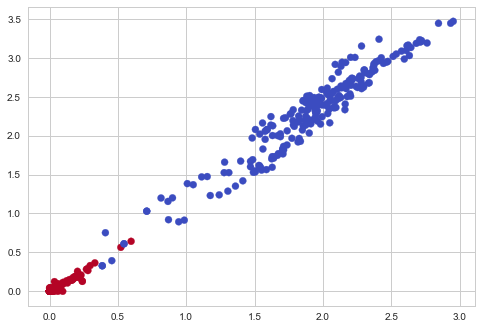

In [66]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [67]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

 32/412 [=>............................] - ETA: 0s

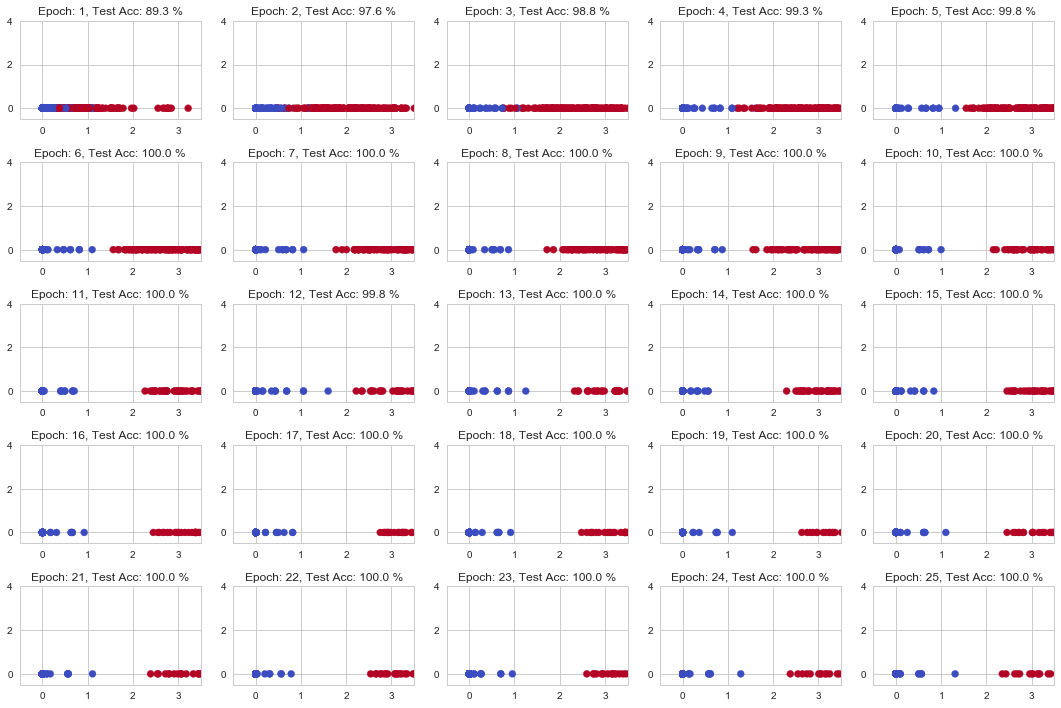

In [68]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [69]:
wine = pd.read_csv("../data/wines.csv")

In [70]:
wine.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [71]:
target = np.array(pd.get_dummies(wine.Class.values))

In [72]:
target[0:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

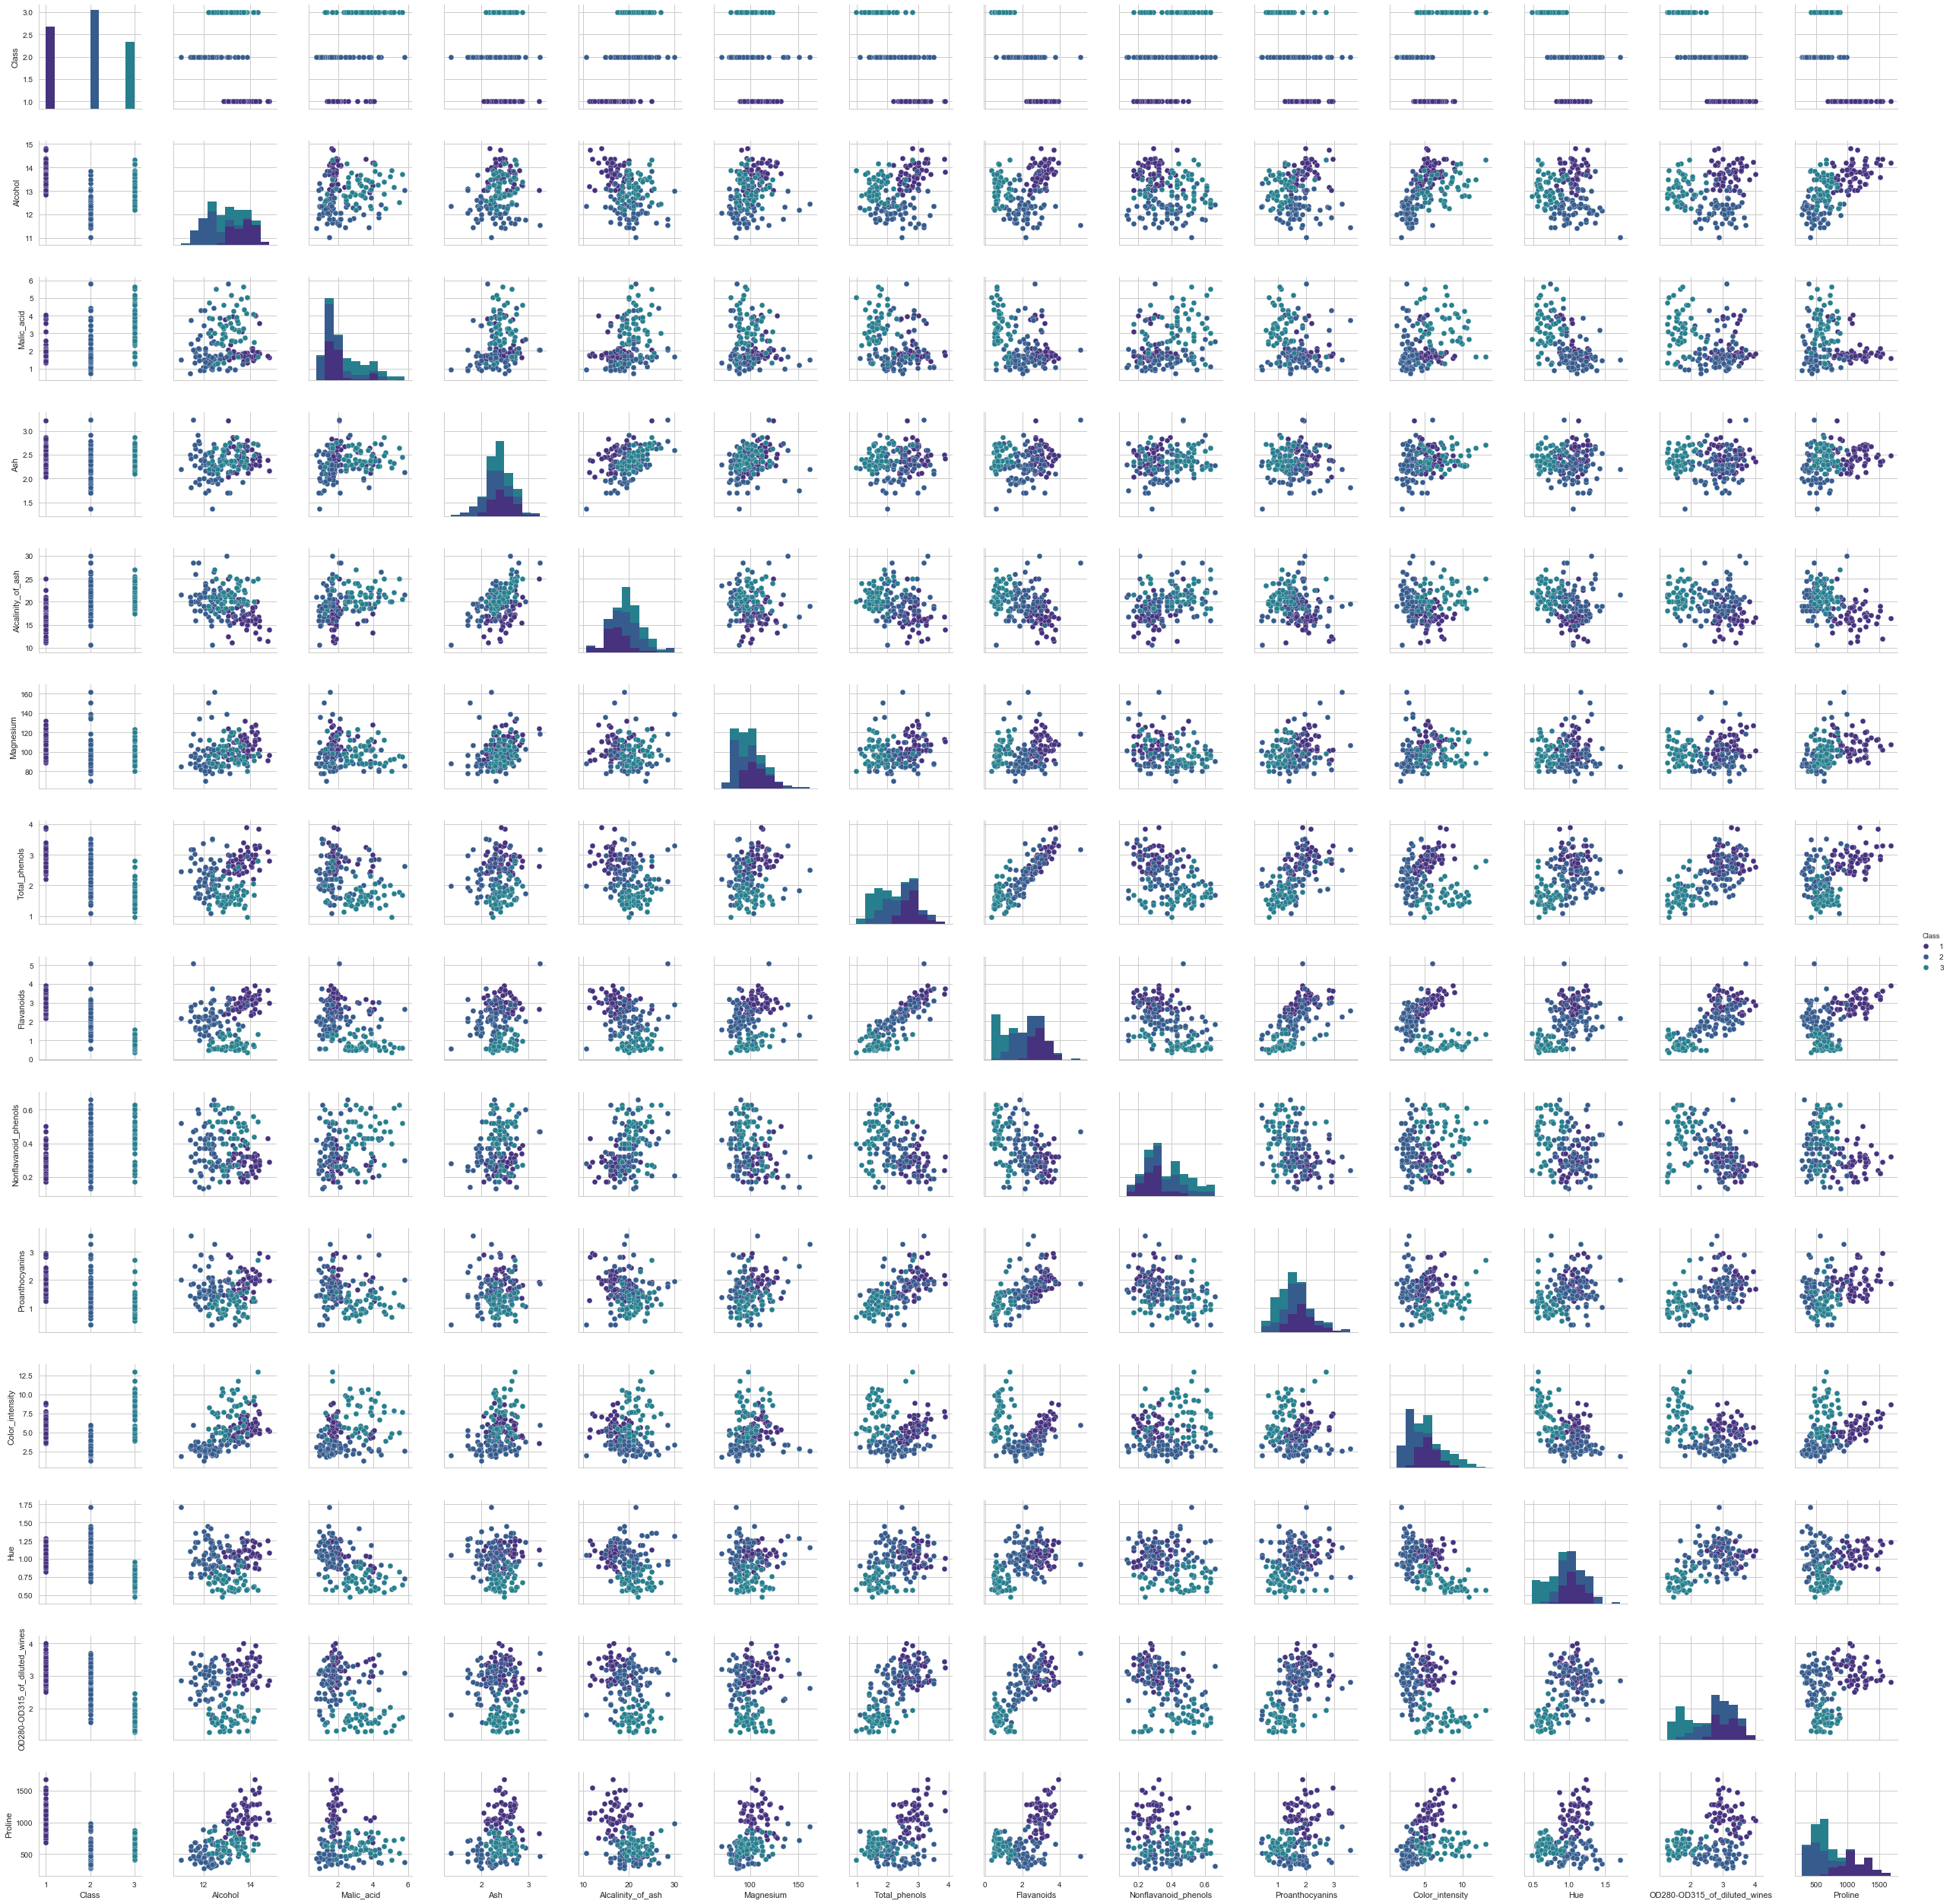

In [373]:
sns.pairplot(wine, hue = "Class")

In [74]:
from sklearn.preprocessing import MinMaxScaler

# note: we should really only use min-max scaler on the training set and then use that to transform the test set. 
mms = MinMaxScaler()
X = mms.fit_transform(wine.drop('Class', axis=1))
y = target

In [75]:
wine.drop('Class', axis=1).columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280-OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [76]:
pd.DataFrame(X, columns=wine.drop('Class', axis=1).columns).describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
X.shape

(178, 13)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=46)

In [79]:
K.clear_session()

In [374]:
# build deep model
model = Sequential()
model.add(Dense(6, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='RMSProp',
              metrics=['accuracy'])

In [375]:
X.shape[1]

13

In [376]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 15        
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [379]:
h = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=0)
test_accuracy = model.evaluate(X_test, y_test)[1]

32/54 [================>.............] - ETA: 0s

In [380]:
test_accuracy

0.94444445548234157

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [182]:
# build deep model
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='relu', kernel_initializer='normal'))
model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [189]:

h = model.fit(X_train, y_train, batch_size=16, epochs=500, verbose=0)
test_accuracy = model.evaluate(X_test, y_test)[1]
test_accuracy

32/36 [=========================>....] - ETA: 0s

0.94444444444444442

In [190]:
# define feature function
model.layers

In [216]:
import matplotlib.cm as cm

32/36 [=========================>....] - ETA: 0s

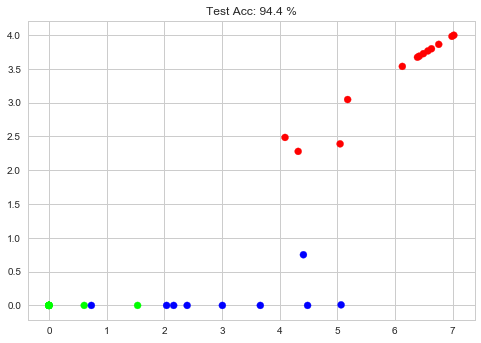

In [218]:
inp = model.layers[0].input
out = model.layers[2].output
features_function = K.function([inp], [out])
test_accuracy = model.evaluate(X_test, y_test)[1]
features = features_function([X_test])[0]
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap=cm.viridis_r)
plt.title('Test Acc: {:3.1f} %'.format(test_accuracy * 100.0))

In [113]:
inp # input data is 13 columns

<tf.Tensor 'dense_1_input:0' shape=(?, 13) dtype=float32>

In [114]:
out # output of 3rd node has two dimensions

<tf.Tensor 'dense_3/Relu:0' shape=(?, 2) dtype=float32>

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [235]:
from keras.layers import Input, Dense
from keras.models import Model
K.clear_session()

In [414]:
inputs = Input(shape = (X.shape[1],)) # X.shape is 13, b/c there are 13 columns

hidden1 = Dense(8, activation = "tanh")(inputs)
hidden2 = Dense(5, activation = "tanh")(hidden1)
second_to_last = Dense(2, activation= "tanh")(hidden2)
outputs = Dense(3, activation = "softmax")(second_to_last)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [415]:
model.fit(X_train, y_train, batch_size=16, epochs=500, verbose=0)  # starts training
test_accuracy = model.evaluate(X_test, y_test)[1]
test_accuracy

32/54 [================>.............] - ETA: 0s

0.98148147485874315

32/54 [================>.............] - ETA: 0s

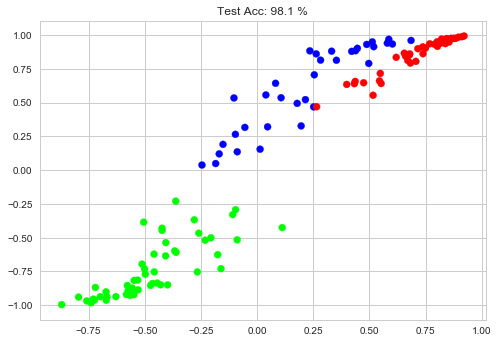

In [416]:
inp = model.layers[0].input
out = model.layers[2].output
features_function = K.function([inp], [out])
test_accuracy = model.evaluate(X_test, y_test)[1]
features = features_function([X_train])[0]
plt.scatter(features[:, 0], features[:, 1], c=y_train, cmap=cm.viridis_r)
plt.title('Test Acc: {:3.1f} %'.format(test_accuracy * 100.0))

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [364]:
K.clear_session()


In [365]:
inputs = Input(shape = (X.shape[1],)) # X.shape is 13, b/c there are 13 columns

hidden1 = Dense(8, activation = "relu")(inputs)
hidden2 = Dense(5, activation = "relu")(hidden1)
second_to_last = Dense(2, activation= "relu")(hidden2)
outputs = Dense(3, activation = "softmax")(second_to_last)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [366]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

In [367]:
import os

In [368]:
checkPath = os.path.join("C:\\Users\\calli\\Desktop", "checkpoints")

if not os.path.exists(checkPath):
    os.mkdir(checkPath)

In [419]:
earlyStop = EarlyStopping(monitor='val_loss',  patience=1, verbose=1, mode='auto')
modCheck = ModelCheckpoint(os.path.join(checkPath, "weights.{epoch:02d}-{val_loss:.2f}.hdf5"), monitor = "val_loss", save_best_only=False)


# Use the TensorBoard callback to output your training information to a /tmp/ subdirectory
tmpPath = os.path.join("C:\\Users\\calli\\Desktop", "tmp")
if not os.path.exists(tmpPath):
    os.mkdir(tmpPath)
    
tensBoard = TensorBoard(log_dir=tmpPath)


In [420]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], callbacks=[earlyStop, modCheck, tensBoard],  epochs = 500, verbose = 0)

Epoch 00003: early stopping


In [421]:
test_accuracy = model.evaluate(X_test, y_test)[1]
test_accuracy


32/54 [================>.............] - ETA: 0s

0.98148147485874315

In [372]:
tmpPath

'C:\\Users\\calli\\Desktop\\tmp'